In [1]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
  import cv2
  import mediapipe as mp
  from google.colab.patches import cv2_imshow

In [ ]:
  # Initialize the MediaPipe Hands object
  mp_hands = mp.solutions.hands
  mp_drawing = mp.solutions.drawing_utils
  mp_drawing_styles = mp.solutions.drawing_styles

Landmark coordinates: (0.6523877382278442, 0.9593779444694519)
Landmark coordinates: (0.47858285903930664, 0.9141680598258972)
Landmark coordinates: (0.34994250535964966, 0.8039156794548035)
Landmark coordinates: (0.3199617862701416, 0.6761903166770935)
Landmark coordinates: (0.3760685324668884, 0.5885497331619263)
Landmark coordinates: (0.468181312084198, 0.546904981136322)
Landmark coordinates: (0.4598695933818817, 0.35412824153900146)
Landmark coordinates: (0.4678252637386322, 0.2410593181848526)
Landmark coordinates: (0.48228225111961365, 0.1450943648815155)
Landmark coordinates: (0.5779491662979126, 0.5234026312828064)
Landmark coordinates: (0.5760097503662109, 0.309476375579834)
Landmark coordinates: (0.5829349756240845, 0.17925754189491272)
Landmark coordinates: (0.5899375677108765, 0.06865355372428894)
Landmark coordinates: (0.6782239079475403, 0.537963330745697)
Landmark coordinates: (0.6776848435401917, 0.33904480934143066)
Landmark coordinates: (0.6789968013763428, 0.2196871

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


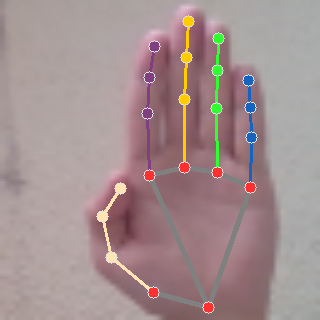

In [ ]:
  hands = mp_hands.Hands(
      static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)

  # Read the image
  image = cv2.imread("/HandImages/10.png")

  # Resize the image to make it larger
  scale_factor = 5  # Adjust this value as needed
  image_bgr_resized = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor)

  # Convert the image to RGB format
  image_rgb = cv2.cvtColor(image_bgr_resized, cv2.COLOR_BGR2RGB)

  # Process the image with MediaPipe Hands
  results = hands.process(image_rgb)

  # Convert the image back to BGR format
  image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

  # Draw hand landmarks on the image
  if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
          mp_drawing.draw_landmarks(
              image_bgr, hand_landmarks, mp_hands.HAND_CONNECTIONS,
              mp_drawing_styles.get_default_hand_landmarks_style(),
              mp_drawing_styles.get_default_hand_connections_style())

          # Print the coordinates of the landmarks
          for landmark in hand_landmarks.landmark:
              print(f"Landmark coordinates: ({landmark.x}, {landmark.y})")

  # Display the image with hand landmarks
  cv2_imshow((image_bgr))
  cv2.waitKey(0)
  cv2.destroyAllWindows()